In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\data_jobs.csv")
df.head()

# cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# filter for Data Analyst jobs
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


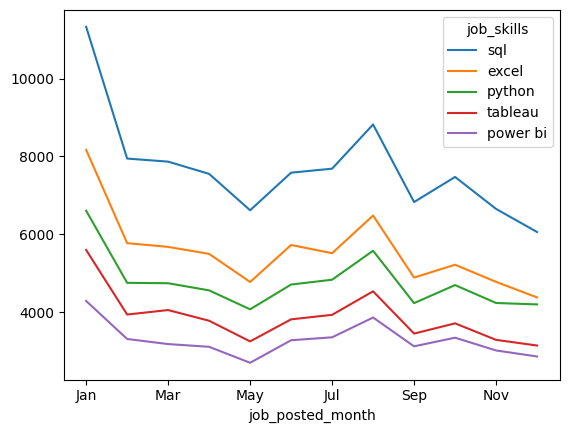

In [ ]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
# Explode job_skills
df_DA_explode = df_DA.explode('job_skills')
#pivot the data
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
# create a new row for total counts
df_DA_pivot.loc['Total'] =df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

# drop the total row for plotting
df_DA_pivot = df_DA_pivot.drop('Total')

# use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x:pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns=['job_posted_month_no'])
# plot the top 5 skills over months
df_DA_pivot.iloc[:, :5].plot(kind='line')

df_DA_pivot

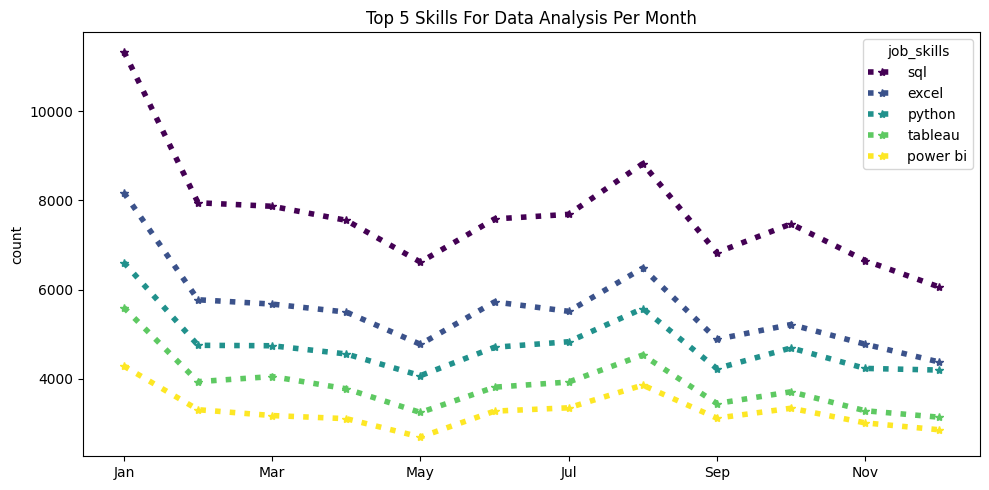

In [ ]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # '-', '--', '-.', ':'
    colormap='viridis',
    marker='*',    # 'o', 's', '^', 'D', '*
    markersize=6,
    figsize=(10, 5)
)

plt.title('Top 5 Skills For Data Analysis Per Month')
plt.ylabel('count')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
# explode skills and drop rows with missing skills
df_exploded = df.explode('job_skills').dropna(subset=['job_skills'])

# normalize skill strings (optional but useful)
df_exploded['job_skills'] = df_exploded['job_skills'].astype(str).str.strip().str.lower()

# use the existing salary column name 'salary_year_avg' for median calculation
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)
print(skill_stats)


            skill_count  median_salary
job_skills                            
sql              384849       120000.0
python           380909       125000.0
aws              145381       135000.0
azure            132527       125000.0
r                130892       119550.0
tableau          127213       111175.0
excel            127018        92500.0
spark            114609       140000.0
power bi          98147       102000.0
java              85612       134241.0
sas               83404       110000.0
hadoop            64842       135000.0
scala             56886       147500.0
snowflake         55015       135000.0
databricks        53182       127500.0
gcp               50727       133500.0
git               50226       125000.0
kafka             49926       147500.0
airflow           45254       147090.5
oracle            45221       112500.0


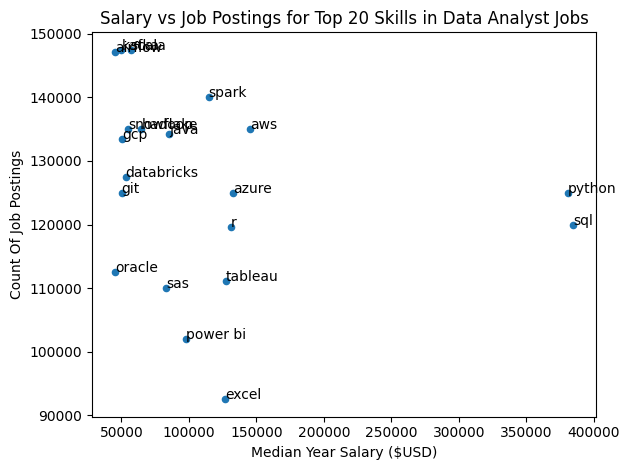

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.ylabel('Count Of Job Postings')
plt.xlabel('Median Year Salary ($USD)')
plt.title('Salary vs Job Postings for Top 20 Skills in Data Analyst Jobs')
plt.tight_layout()
# to display the texts on the plot, ref matplotlib.pyplot.text()
# parse in for loop to show skill names on the plot
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

    # adjust text position if needed reference; adjusttext.readheaddocs.io/en/latest/
    # adjusttext.adjust_text(plt.gca().texts, arrowprops=dict(arrowstyle='->', color='red'))


plt.show()

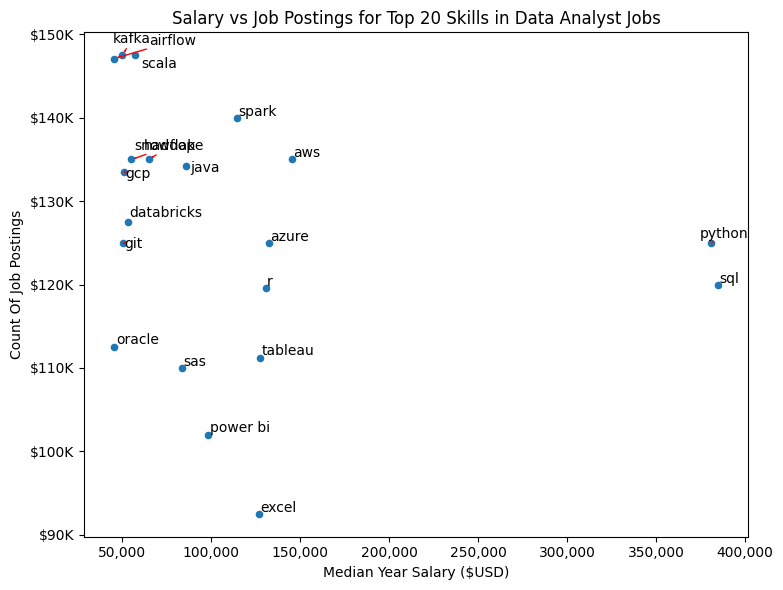

In [ ]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(8,6))
plt.ylabel('Count Of Job Postings')
plt.xlabel('Median Year Salary ($USD)')
plt.title('Salary vs Job Postings for Top 20 Skills in Data Analyst Jobs')
plt.tight_layout()
# to display the texts on the plot, ref matplotlib.pyplot.text()
# parse in for loop to show skill names on the plot
texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='r', lw=1))   

    # adjust text position if needed reference; adjusttext.readheaddocs.io/en/latest/
    # adjusttext.adjust_text(plt.gca().texts, arrowprops=dict(arrowstyle='->', color='red'))

# get 3 digits eg 100k
# class matplotlib.ticker.FuncFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))
# formating x axis to have commas
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))



plt.show()